# 3. Diachrony

In [ ]:
import os
import shutil
import json
import glob
from collections import Counter

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

font = {'family' : 'Arial',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

We reload the normalized data:

In [2]:
normalized_eras = []

for fn in sorted(glob.glob('../data/eras_normalized/*.csv')):
    print(fn)
    normalized_eras.append(pd.read_csv(fn))

../data/eras_normalized/S1.csv
../data/eras_normalized/S2.csv
../data/eras_normalized/S3.csv
../data/eras_normalized/S4.csv


## Modifiers

In [3]:
with open('../annotations/modifiers.json') as f:
    modifiers = json.load(f)

descriptive = [m for m in modifiers if modifiers[m] == 'D']
evaluative = [m for m in modifiers if modifiers[m] == 'E']

In [4]:
attestations = []

for idx, era in enumerate(normalized_eras):
    counts = Counter(era['normalized'])
    for d in descriptive:
        freq = counts[d] / len(era)
        attestations.append((d, freq, 'descriptive', 'SP' + str(idx+1)))
    for e in evaluative:
        freq = counts[e] / len(era)
        attestations.append((e, freq, 'evaluative', 'SP' + str(idx+1)))

attestations = pd.DataFrame(attestations, columns=('token', 'frequency', 'category', 'era'))
attestations

,token,frequency,category,era
0,adapted,0.000045,descriptive,SP1
1,arched,0.000015,descriptive,SP1
2,attached,0.000000,descriptive,SP1
3,bay,0.000055,descriptive,SP1
4,billiard,0.000061,descriptive,SP1
...,...,...,...,...
1123,valuable,0.002816,evaluative,SP4
1124,very,0.002451,evaluative,SP4
1125,well-bred,0.001111,evaluative,SP4
1126,well-built,0.000003,evaluative,SP4


In [5]:
d = attestations.pivot_table(values='frequency', index='token', columns='era').transpose()
d.head()

token,adapted,admired,airy,ancient,antique,arable,arched,attached,bay,beautiful,...,window,winged,womens,wood,woollen,worsted,worsted-damask,writing,wrought,yellow
era,,,,,,,,,,,,,,,,,,,,,
SP1,0.000045,0.000016,0.000068,0.000061,0.000240,0.000122,0.000015,0.000000,0.000055,0.000552,...,0.001073,0.000035,0.000238,0.000450,0.000332,0.001319,3.763719e-05,0.000253,0.000621,0.000217
SP2,0.000244,0.000086,0.000071,0.000100,0.000093,0.000324,0.000119,0.000009,0.000369,0.000390,...,0.000368,0.000034,0.000207,0.000598,0.000055,0.000951,3.845488e-07,0.000132,0.000170,0.000110
SP3,0.000358,0.000140,0.000278,0.000249,0.000247,0.000843,0.000204,0.000274,0.000127,0.001002,...,0.000512,0.000056,0.000087,0.000725,0.000057,0.001020,1.057982e-06,0.000256,0.000109,0.000054
SP4,0.000534,0.000151,0.000167,0.000374,0.000182,0.000851,0.000232,0.000202,0.000520,0.000780,...,0.000542,0.000238,0.000243,0.000835,0.000087,0.002385,2.070253e-06,0.000414,0.000095,0.000074


In [6]:
scaler = StandardScaler()
cols_to_norm = d.columns
d[cols_to_norm] = scaler.fit_transform(d[cols_to_norm])
d

token,adapted,admired,airy,ancient,antique,arable,arched,attached,bay,beautiful,...,window,winged,womens,wood,woollen,worsted,worsted-damask,writing,wrought,yellow
era,,,,,,,,,,,,,,,,,,,,,
SP1,-1.408569,-1.537053,-0.908563,-1.084107,0.797357,-1.290953,-1.509365,-1.013665,-1.142072,-0.557924,...,1.679338,-0.652005,0.705206,-1.405919,1.721671,-0.174344,1.730802,-0.103732,1.717400,1.644076
SP2,-0.288660,-0.229477,-0.873566,-0.770964,-1.579486,-0.658288,-0.275777,-0.939771,0.542600,-1.256915,...,-0.954239,-0.667097,0.200399,-0.376761,-0.674904,-0.813107,-0.626699,-1.317571,-0.363704,-0.065958
SP3,0.352473,0.772601,1.532705,0.422717,0.921905,0.961824,0.730711,1.277848,-0.754203,1.388079,...,-0.418981,-0.403430,-1.688210,0.508934,-0.650843,-0.693905,-0.584082,-0.077764,-0.645149,-0.943065
SP4,1.344757,0.993930,0.249424,1.432354,-0.139777,0.987417,1.054431,0.675588,1.353674,0.426759,...,-0.306118,1.722532,0.782605,1.273746,-0.395924,1.681356,-0.520021,1.499066,-0.708548,-0.635054


In [7]:
tau = [stats.kendalltau(d[c].values, range(len(d[c])))[0] for c in d.columns]

In [8]:
d_tau = d.transpose()
d_tau['tau'] = tau
d_tau['category'] = d_tau.index.isin(descriptive)
d_tau['category'] = d_tau['category'].map({True: 'Desc', False: 'Eval'})
d_tau.groupby('category').mean()

era,SP1,SP2,SP3,SP4,tau
category,,,,,
Desc,0.214359,-0.406092,0.026862,0.164870,0.076923
Eval,-0.461974,-0.219575,0.462137,0.219411,0.285795


In [9]:
print(d_tau.groupby('category').mean().to_latex())

\begin{tabular}{lrrrrr}
\toprule
era &       SP1 &       SP2 &       SP3 &       SP4 &       tau \\
category &           &           &           &           &           \\
\midrule
Desc     &  0.214359 & -0.406092 &  0.026862 &  0.164870 &  0.076923 \\
Eval     & -0.461974 & -0.219575 &  0.462137 &  0.219411 &  0.285795 \\
\bottomrule
\end{tabular}



In [10]:
figdir = '../figures'
try:
    shutil.rmtree(figdir)
except FileNotFoundError:
    pass
os.mkdir(figdir)

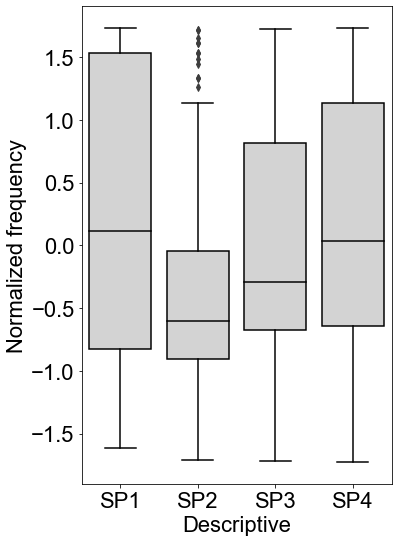

In [11]:
fig, ax = plt.subplots(figsize=(6, 8))
desc_tau = d_tau[d_tau['category'] == 'Desc']
sns.boxplot(data=desc_tau[['SP1', 'SP2', 'SP3', 'SP4']])
plt.grid(False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='lightgrey')
plt.setp(ax.lines, color='k')
plt.ylabel('Normalized frequency')
plt.xlabel('Descriptive')
plt.tight_layout()
plt.savefig(figdir + '/boxplots_Desc.pdf')

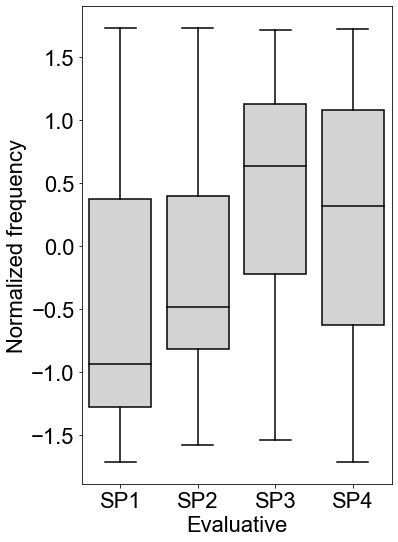

In [12]:
fig, ax = plt.subplots(figsize=(6, 8))
desc_tau = d_tau[d_tau['category'] == 'Eval']
sns.boxplot(data=desc_tau[['SP1', 'SP2', 'SP3', 'SP4']])
plt.grid(False)
plt.setp(ax.artists, edgecolor = 'k', facecolor='lightgrey')
plt.setp(ax.lines, color='k')
plt.ylabel('Normalized frequency')
plt.xlabel('Evaluative')
plt.tight_layout()
plt.savefig(figdir + '/boxplots_Eval.pdf')

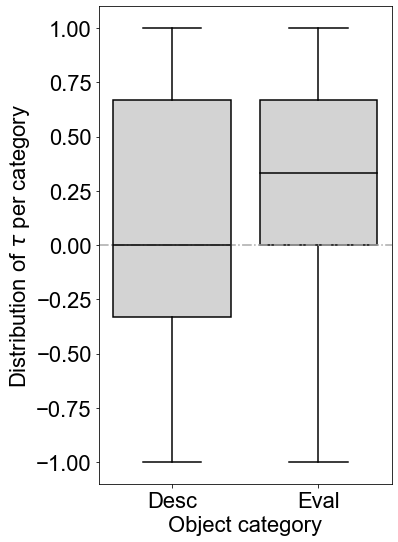

In [13]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(x='category', y='tau', data=d_tau, ax=ax)
plt.setp(ax.artists, edgecolor = 'k', facecolor='lightgrey')
plt.setp(ax.lines, color='k')
plt.xlabel('Object category')
plt.axhline(0, c='darkgrey', ls='-.')
plt.ylabel(r'Distribution of $\tau$ per category')
plt.tight_layout()
plt.savefig(figdir + '/boxplots_DescEvalTau.pdf')

In [14]:
descriptive_taus = list(d_tau[d_tau['category'] == 'Desc']['tau'])
evaluative_taus = list(d_tau[d_tau['category'] == 'Eval']['tau'])

stats.mannwhitneyu(descriptive_taus, evaluative_taus, alternative='less')

MannwhitneyuResult(statistic=7189.5, pvalue=0.0015609426401338165)

## Objects

In [15]:
with open('../annotations/objects.json') as f:
    objects = json.load(f)

In [16]:
objects

{'apartment': 'real estate',
 'attic': 'real estate',
 'barrel': 'appliances/utensils',
 'bath': 'real estate',
 'bed-room': 'real estate',
 'bedchamber': 'real estate',
 'bedstead': 'furniture',
 'bookcase': 'furniture',
 'books': 'decoration',
 'bottles': 'tableware',
 'boxes': 'decoration',
 'bracelet': 'accessories',
 'brewhouse': 'real estate',
 'buildings': 'real estate',
 'bureau': 'furniture',
 'butts': 'appliances/utensils',
 'cabinet': 'furniture',
 'cabinet-work': 'furniture',
 'candelabra': 'decoration',
 'candlestick': 'decoration',
 'canopy': 'furniture',
 'carpet': 'decoration',
 'cellar': 'real estate',
 'cellarets': 'furniture',
 'cellaring': 'real estate',
 'chair': 'furniture',
 'chaise': 'furniture',
 'chamber': 'real estate',
 'chandelier': 'decoration',
 'chest': 'furniture',
 'chimney': 'appliances/utensils',
 'chimney-glass': 'decoration',
 'china': 'tableware',
 'cistern': 'real estate',
 'closet': 'furniture',
 'clothes': 'clothing/fabric',
 'coach-house': 're

In [17]:
attestations = []

for idx, era in enumerate(normalized_eras):
    counts = Counter(era['normalized'])
    for o in objects:
        freq = counts[o] / len(era)
        attestations.append((o, freq, objects[o], 'SP' + str(idx+1)))

attestations = pd.DataFrame(attestations, columns=('token', 'frequency', 'category', 'era'))
attestations

,token,frequency,category,era
0,apartment,0.000201,real estate,SP1
1,attic,0.000005,real estate,SP1
2,barrel,0.000302,appliances/utensils,SP1
3,bath,0.000132,real estate,SP1
4,bed-room,0.000804,real estate,SP1
...,...,...,...,...
503,vase,0.000009,decoration,SP4
504,villa,0.000363,real estate,SP4
505,wardrobe,0.000427,furniture,SP4
506,warehouse,0.000296,real estate,SP4


In [18]:
d = attestations.pivot_table(values='frequency', index='token', columns='era').transpose()
d.head()

token,apartment,attic,barrel,bath,bed-room,bedchamber,bedstead,bookcase,books,bottles,...,stove,tenenement,timber,trinket,utensil,vase,villa,wardrobe,warehouse,wash-house
era,,,,,,,,,,,,,,,,,,,,,
SP1,0.000201,0.000005,0.000302,0.000132,0.000804,0.000004,0.000211,0.000030,0.001779,0.000222,...,0.000292,0.000380,0.000082,0.000001,0.000284,0.000003,0.000013,0.000324,0.002012,0.000000e+00
SP2,0.000193,0.000020,0.000218,0.000193,0.001380,0.000027,0.000492,0.000050,0.000968,0.000088,...,0.000224,0.000274,0.000228,0.000107,0.000444,0.000002,0.000167,0.000118,0.000576,3.845488e-07
SP3,0.000411,0.000103,0.000113,0.000311,0.002414,0.000147,0.000974,0.000372,0.000916,0.000125,...,0.000305,0.000339,0.000330,0.000084,0.000257,0.000010,0.000690,0.000495,0.000465,5.818904e-06
SP4,0.000481,0.000078,0.000136,0.000403,0.001648,0.000054,0.000616,0.000202,0.000690,0.000253,...,0.000102,0.000366,0.000494,0.000019,0.000212,0.000009,0.000363,0.000427,0.000296,6.900842e-06


In [19]:
scaler = StandardScaler()
cols_to_norm = d.columns
d[cols_to_norm] = scaler.fit_transform(d[cols_to_norm])
d

token,apartment,attic,barrel,bath,bed-room,bedchamber,bedstead,bookcase,books,bottles,...,stove,tenenement,timber,trinket,utensil,vase,villa,wardrobe,warehouse,wash-house
era,,,,,,,,,,,,,,,,,,,,,
SP1,-0.952147,-1.148256,1.475528,-1.217620,-1.307993,-0.998508,-1.323022,-0.969243,1.675318,0.743075,...,0.764629,0.991255,-1.343554,-1.170944,-0.177988,-0.968177,-1.168590,-0.122439,1.713649,-1.053262
SP2,-1.009718,-0.786767,0.344013,-0.637278,-0.313296,-0.563989,-0.295819,-0.824783,-0.291954,-1.240628,...,-0.081428,-1.615959,-0.365977,1.229481,1.657105,-1.022421,-0.557354,-1.564584,-0.380976,-0.929629
SP3,0.707594,1.276015,-1.066467,0.485319,1.472729,1.636877,1.462024,1.517913,-0.416704,-0.695919,...,0.918425,-0.012426,0.307193,0.717576,-0.486152,1.129554,1.508848,1.082325,-0.543343,0.817523
SP4,1.254271,0.659008,-0.753074,1.369578,0.148560,-0.074380,0.156817,0.276114,-0.966660,1.193473,...,-1.601626,0.637130,1.402339,-0.776113,-0.992965,0.861044,0.217096,0.604697,-0.789330,1.165368


In [20]:
tau = [stats.kendalltau(d[c].values, range(len(d[c])))[0] for c in d.columns]

In [21]:
d_tau = d.transpose()
d_tau['tau'] = tau
d_tau['category'] = [objects[t] for t in d_tau.index]
d_tau.groupby('category').mean()

era,SP1,SP2,SP3,SP4,tau
category,,,,,
accessories,-0.466935,-0.371276,0.549019,0.289192,2.666667e-01
animal/accessories,-0.964805,0.834443,-0.141400,0.271763,3.333333e-01
appliances/utensils,0.415843,-0.235120,-0.215186,0.034462,-3.703704e-02
clothing/fabric,0.805513,-0.742719,-0.336238,0.273444,-6.666667e-02
decoration,0.507716,-0.711822,-0.110854,0.314960,-1.233581e-17
furniture,0.367749,-0.684558,0.093221,0.223588,8.000000e-02
instrument,-0.085673,-0.819356,0.497428,0.407601,3.333333e-01
real estate,-0.699716,-0.338680,0.588419,0.449977,4.275362e-01
tableware,0.299101,-0.657007,0.008425,0.349480,1.111111e-01


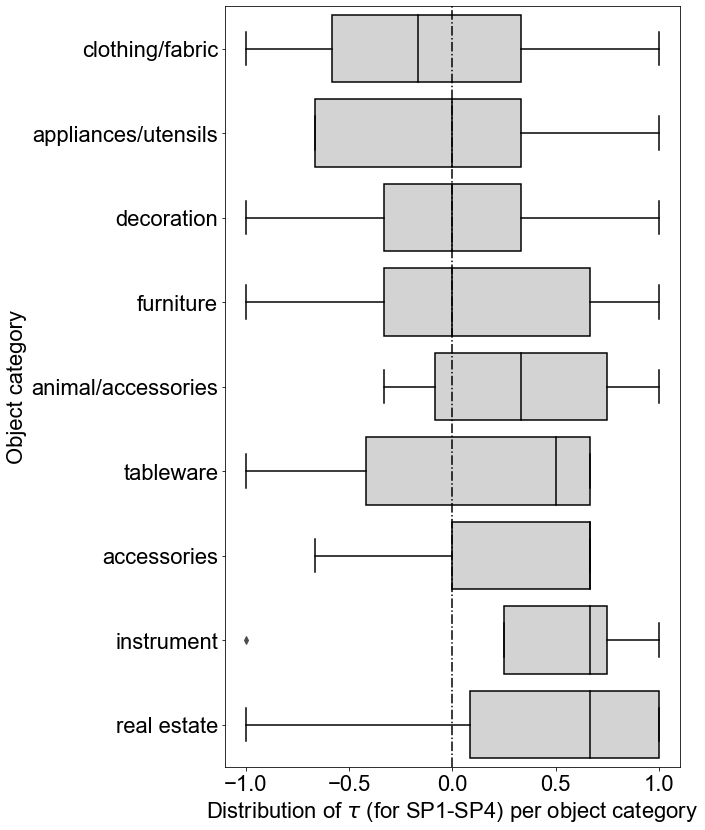

In [22]:
grouped = d_tau.loc[:,['category', 'tau']] \
    .groupby(['category']) \
    .median().sort_values(by='tau')

fig, ax = plt.subplots(figsize=(10, 12))
sns.boxplot(x='tau', y='category', data=d_tau, order=grouped.index, ax=ax, orient="h", color='grey')
plt.setp(ax.artists, edgecolor = 'k', facecolor='lightgrey')
plt.axvline(0, c='lightgrey', ls='-.')
plt.setp(ax.lines, color='k')
plt.ylabel('Object category')
plt.xlabel(r'Distribution of $\tau$ (for SP1-SP4) per object category')
plt.tight_layout()
plt.savefig(figdir + '/boxplots_ObjectCats.pdf')

Against simple stacking, where descriptive modifiers would have been *complemented* with evaluative modifiers, they former actuall  seem to have replaced them.

In [23]:
data = []

for era_idx, era in enumerate(normalized_eras):
    tokens = era['normalized']
    for idx, token in enumerate(tokens):
        if token in objects:
            if tokens[idx-1] in modifiers:
                back_idx = 0
                while True:
                    back_idx += 1
                    if tokens[idx-back_idx] not in modifiers:
                        data.append((token, back_idx - 1, f'SP{era_idx + 1}'))
                        break
            else:
                data.append((token, 0, f'SP{era_idx + 1}'))

In [24]:
lengths = pd.DataFrame(data, columns=('token', 'length', 'period'))
lengths

,token,length,period
0,books,0,SP1
1,court,0,SP1
2,warehouse,0,SP1
3,clothes,0,SP1
4,jewellery,2,SP1
...,...,...,...
574844,earring,0,SP4
574845,bed-room,0,SP4
574846,closet,0,SP4
574847,premises,0,SP4


In [25]:
lengths = lengths[lengths['length'] >= 1]

[None]

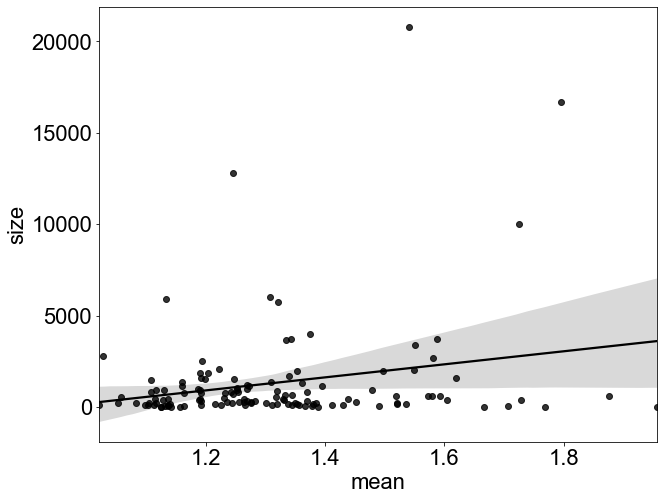

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
ss_eff = pd.DataFrame(zip(lengths.groupby('token')['length'].mean(), lengths.groupby('token')['length'].size()),
                      columns=('mean', 'size'))

sns.regplot(x='mean', y='size', data=ss_eff, ax=ax, color='k');
ss_eff.corr(method='kendall')
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

Summary statistics:

In [27]:
summ = lengths.groupby('period')['length'].describe()
summ = summ[['count', 'mean', 'std']]
summ

,count,mean,std
period,,,
SP1,12341.0,1.376793,0.676050
SP2,31737.0,1.360368,0.616845
SP3,78017.0,1.469116,0.778379
SP4,46322.0,1.348042,0.642689


In [28]:
counts = []
for group, period in lengths.groupby('period')['length']:
    p = period.value_counts()[:4] / period.size
    counts.append(list(p.values))

print(counts)   
counts = pd.DataFrame(counts, columns=['prop(f1)', 'prop(f2)', 'prop(f3)', 'prop(f4)'],
                     index=summ.index)
counts

[[0.711773762255895, 0.21862085730491856, 0.05388542257515598, 0.012721821570375172], [0.698994864038819, 0.2549075211897785, 0.0348804234804802, 0.009484198254403378], [0.6633682402553289, 0.2384480305574426, 0.0732148121563249, 0.01743209813245831], [0.7256163378092483, 0.2160960234877596, 0.046306290747377056, 0.009131730063468763]]


,prop(f1),prop(f2),prop(f3),prop(f4)
period,,,,
SP1,0.711774,0.218621,0.053885,0.012722
SP2,0.698995,0.254908,0.034880,0.009484
SP3,0.663368,0.238448,0.073215,0.017432
SP4,0.725616,0.216096,0.046306,0.009132


In [29]:
summ = pd.concat([summ, counts], axis=1)
summ

,count,mean,std,prop(f1),prop(f2),prop(f3),prop(f4)
period,,,,,,,
SP1,12341.0,1.376793,0.676050,0.711774,0.218621,0.053885,0.012722
SP2,31737.0,1.360368,0.616845,0.698995,0.254908,0.034880,0.009484
SP3,78017.0,1.469116,0.778379,0.663368,0.238448,0.073215,0.017432
SP4,46322.0,1.348042,0.642689,0.725616,0.216096,0.046306,0.009132


In [30]:
print(summ.drop('count', axis=1).round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &   mean &    std &  prop(f1) &  prop(f2) &  prop(f3) &  prop(f4) \\
period &        &        &           &           &           &           \\
\midrule
SP1    &  1.377 &  0.676 &     0.712 &     0.219 &     0.054 &     0.013 \\
SP2    &  1.360 &  0.617 &     0.699 &     0.255 &     0.035 &     0.009 \\
SP3    &  1.469 &  0.778 &     0.663 &     0.238 &     0.073 &     0.017 \\
SP4    &  1.348 &  0.643 &     0.726 &     0.216 &     0.046 &     0.009 \\
\bottomrule
\end{tabular}



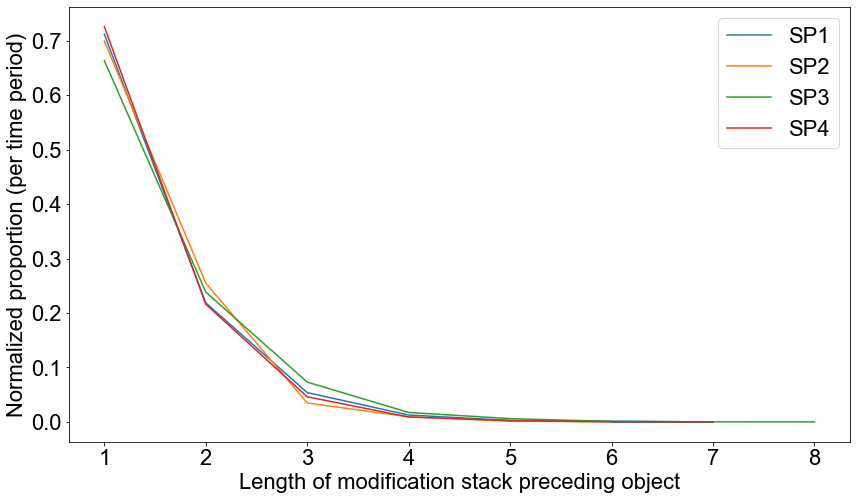

In [31]:
fig, ax = plt.subplots(figsize=(14, 8))
for group, period in lengths.groupby('period'):
    p = period['length'].value_counts()
    p = p / p.sum()
    p.plot(ax=ax, label=group)
plt.xlabel('Length of modification stack preceding object')
plt.ylabel('Normalized proportion (per time period)')
plt.legend();

## Premodification dataset

In [32]:
rich_eras = []

for era in normalized_eras:
    mod_, obj_ = [], []
    
    for hw in era['normalized']:
        if hw in modifiers:
            mod_.append(modifiers[hw])
        else:
            mod_.append('NA')
        if hw in objects:
            obj_.append(objects[hw])
        else:
            obj_.append('NA')
    
    era['mod'] = mod_
    era['obj'] = obj_
    
    rich_eras.append(era)

In [33]:
rich_eras[0].head(10)

,Unnamed: 0,token,normalized,mod,obj
0,0,maimurteammwamamye,maimurteammwamamye,NA,NA
1,1,to,to,NA,NA
2,2,be,be,NA,NA
3,3,fold,fold,NA,NA
4,4,by,by,NA,NA
5,5,auce,auce,NA,NA
6,6,jon,crimson,D,NA
7,7,a,a,NA,NA
8,8,this,this,NA,NA
9,9,day,day,NA,NA


In [34]:
pred_data = []

for sp, era in enumerate(rich_eras):
    tokens, normalized, mod_cats, head_types = era['token'], era['normalized'], era['mod'], era['obj']
    for idx, (token, norm, mod_cat) in enumerate(zip(tokens, normalized, mod_cats)):
        try:
            if mod_cat != 'NA' and head_types[idx + 1] != 'NA':
                pred_data.append((token, norm, sp, head_types[idx + 1], normalized[idx + 1], mod_cat))
        except KeyError:
            pass
            
pred_data = pd.DataFrame(pred_data, columns=('token', 'normalized', 'period', 'head-cat', 'head-word', 'mod'))
pred_data    

,token,normalized,period,head-cat,head-word,mod
0,fine,fine,0,accessories,jewellery,E
1,houfhold,household,0,furniture,furniture,D
2,glafs,glass,0,decoration,frame,D
3,tree,walnut-tree,0,furniture,chair,D
4,italian,italian,0,decoration,picture,D
...,...,...,...,...,...,...
168412,dwellir,dwelling,3,animal/accessories,horse,D
168413,built,built,3,real estate,house,D
168414,neatr,neat,3,clothing/fabric,habderdashery,E
168415,buill,built,3,real estate,house,D


Shorten levels for plots:

In [35]:
levels = []

for cat in pred_data['head-cat']:
    if len(cat) > 11:
        levels.append('/'.join([t[:4] for t in cat.split('/')]))
    else:
        levels.append(cat)

pred_data['head-cat'] = levels

In [36]:
pred_data.to_csv('../data/premodification.csv', index=False)

In [37]:
print(pred_data.sample(5).to_latex(index=False))

\begin{tabular}{llrlll}
\toprule
    token & normalized &  period &     head-cat &  head-word & mod \\
\midrule
  eminent &    eminent &       1 &  real estate &  warehouse &   E \\
   sublic &     public &       2 &  real estate &      house &   D \\
  pacious &   spacious &       2 &  real estate &  apartment &   E \\
 houfhold &  household &       0 &    furniture &  furniture &   D \\
   marble &     marble &       2 &    appl/uten &    chimney &   D \\
\bottomrule
\end{tabular}

